

# Projeto Airbnb Rio

###O que temos disponível, inspirações e créditos

As bases de dados foram retiradas do site: [kaggle](https://www.kaggle.com/allanbruno/airbnb-rio-de-janeiro)


In [ ]:
import pandas as pd
import pathlib
from google.colab import drive
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

#Importando base de dados

In [ ]:
drive.mount(r'/content/drive')


meses = {'jan':1, 'fev':2, 'mar':3, 'abr':4, 'mai':5, 'jun':6, 'jul':7, 'ago':8, 'set':9, 'out':10, 'nov':11, 'dez':12}


caminho_bases = pathlib.Path(r'/content/drive/MyDrive/dataset')

base_airbnb = pd.DataFrame()

for arquivo in caminho_bases.iterdir():
  nome_mes = arquivo.name[:3]
  mes = meses[nome_mes]
  ano = arquivo.name[-8:]
  ano = int(ano.replace('.csv', ''))
  df = pd.read_csv(caminho_bases / arquivo.name)
  df['ano'] = ano
  df['mes'] = mes
  base_airbnb = base_airbnb.append(df)

display(base_airbnb)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-303-77b91754bb2b>:16: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
<ipython-input-303-77b91754bb2b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_airbnb = base_airbnb.append(df)
<ipython-input-303-77b91754bb2b>:16: DtypeWarning: Columns (62,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
<ipython-input-303-77b91754bb2b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_airbnb = base_airbnb.append(df)
<ipython-input-303-77b91754bb2b>:16: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
<ipyth

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,ano,mes
0,17878,https://www.airbnb.com/rooms/17878,20190923212307,2019-09-24,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for Carni...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for Carni...,none,This is the best spot in Rio. Everything happe...,...,strict_14_with_grace_period,f,f,1,1.0,0.0,0.0,2.13,2019,9
1,25026,https://www.airbnb.com/rooms/25026,20190923212307,2019-09-24,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,strict_14_with_grace_period,t,t,3,3.0,0.0,0.0,2.06,2019,9
2,31560,https://www.airbnb.com/rooms/31560,20190923212307,2019-09-24,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,strict_14_with_grace_period,f,f,1,1.0,0.0,0.0,2.36,2019,9
3,35636,https://www.airbnb.com/rooms/35636,20190923212307,2019-09-24,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,The apartment street is very quiet and safe ....,...,strict_14_with_grace_period,t,t,1,1.0,0.0,0.0,2.25,2019,9
4,35764,https://www.airbnb.com/rooms/35764,20190923212307,2019-09-24,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,none,Our guests will experience living with a local...,...,strict_14_with_grace_period,f,t,1,1.0,0.0,0.0,2.83,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37240,356406,https://www.airbnb.com/rooms/356406,20180914022056,2018-09-14,Luxurious apartment in Copacabana,NaN,Apartment between Copacabana and Ipanema. I ha...,Apartment between Copacabana and Ipanema. I ha...,none,NaN,...,strict_14_with_grace_period,f,f,4,NaN,NaN,NaN,0.07,2018,9
37241,10677877,https://www.airbnb.com/rooms/10677877,20180914022056,2018-09-14,604 Studio Copacabana,"Apartamento todo reformado. Possui wi fi, TV a...",NaN,"Apartamento todo reformado. Possui wi fi, TV a...",none,NaN,...,strict_14_with_grace_period,f,f,4,NaN,NaN,NaN,NaN,2018,9
37242,27831574,https://www.airbnb.com/rooms/27831574,20180914022056,2018-09-14,2 BRs & 2 WC's,NaN,NaN,NaN,none,NaN,...,strict_14_with_grace_period,f,f,1,NaN,NaN,NaN,NaN,2018,9
37243,2066453,https://www.airbnb.com/rooms/2066453,20180914022056,2018-09-14,Charming Studio in Copacabana,Well located within a short stroll from the be...,Bedroom divided by sliding door from dining ro...,Well located within a short stroll from the be...,none,NaN,...,moderate,f,f,1,NaN,NaN,NaN,0.06,2018,9


#Iniciando os tratamentos

- Temos muitas colunas que não são necessárias para o nosso modelo de previsão.

- Vamos excluir todas colunas que não nos acrescentará em nada em nosso projeto, como IDs, links, colunas repetidas, colunas com textos livres.

- Para isso, vamos criar um arquivo Excel com os primeiros 1.000 primeiros registros e fazer uma análise qualitativa, olhando as colunas e identificando quais são desnecessárias para nosso código.

In [ ]:
print(list(base_airbnb.columns))
base_airbnb.head(1000).to_csv('primeiros_registros.csv', sep=';')

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

- Depois da análise qualitativa, levando em consideração todos os critérios acima, ficamos com as seguintes colunas:

In [ ]:
colunas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes']

base_airbnb = base_airbnb.loc[:, colunas]
print(list(base_airbnb.columns))
display(base_airbnb)

['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'ano', 'mes']


,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes
0,within an hour,100%,t,2.0,-22.965920,-43.178960,Condominium,Entire home/apt,5,1.0,...,10.0,10.0,10.0,10.0,9.0,t,f,strict_14_with_grace_period,2019,9
1,within a few hours,100%,f,3.0,-22.977120,-43.190450,Apartment,Entire home/apt,3,1.0,...,10.0,9.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,2019,9
2,within an hour,100%,t,1.0,-22.983020,-43.214270,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period,2019,9
3,within a few hours,100%,t,1.0,-22.988160,-43.193590,Apartment,Entire home/apt,3,1.5,...,9.0,10.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,2019,9
4,within an hour,100%,t,1.0,-22.981270,-43.190460,Loft,Entire home/apt,2,1.0,...,10.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37240,within a day,100%,f,4.0,-22.983058,-43.192096,Apartment,Entire home/apt,6,2.0,...,9.0,10.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,2018,9
37241,within a day,67%,f,4.0,-22.983713,-43.192103,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2018,9
37242,within an hour,100%,f,1.0,-22.982379,-43.192925,Apartment,Entire home/apt,1,2.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2018,9
37243,within a day,50%,f,1.0,-22.976690,-43.193082,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,10.0,f,f,moderate,2018,9


#Tratando os valores vazios

- Visualizando os dados, percebe-se que existe uma grande disparidade em dados que faltam. As colunas com mais de 3000.000 valores NaN foram excluídas da análise

- Para as outras colunas, como temos muitos dados(mais de 9000.000 linhas) vamos excluir as linhas que contém dados NaN.

In [ ]:
for coluna in base_airbnb:
  if base_airbnb[coluna].isnull().sum() > 300000:
    base_airbnb = base_airbnb.drop(coluna, axis=1)
print(base_airbnb.isnull().sum())

host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
ano                            0
mes                            0
dtype: int64


#Excluindo as linhas vazias

In [ ]:
base_airbnb = base_airbnb.dropna()

print(base_airbnb.shape)
print(base_airbnb.isnull().sum())

(897709, 23)
host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64


#Verificando tipos de dados em cada coluna

In [ ]:
print(base_airbnb.dtypes)
print('-'*60)
print(base_airbnb.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
------------------------------------------------------------
host_is_superhost                                                           t
host_listings_count

- Como as colunas price e extra people estão sendo reconhecidos como objeto (ao invés de um float) temos que mudar o tipo de variável da coluna.

In [ ]:
base_airbnb['price'] = base_airbnb['price'].astype(str).str.replace('$', '')
base_airbnb['price'] = base_airbnb['price'].str.replace('$', '')
base_airbnb['price'] = base_airbnb['price'].str.replace(',' ,'')
base_airbnb['price'] = base_airbnb['price'].astype(np.float32, copy=False)


base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',' ,'')
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(np.float32, copy=False)

print(base_airbnb.dtypes)

<ipython-input-309-08044549046f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  base_airbnb['price'] = base_airbnb['price'].astype(str).str.replace('$', '')
<ipython-input-309-08044549046f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  base_airbnb['price'] = base_airbnb['price'].str.replace('$', '')
<ipython-input-309-08044549046f>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$', '')


host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


#Análise exploratória e tratar Outliers
- Ver a correlação entre as features e decidir se manteremos todas as features que temos.

- Excluir outliers (usaremos como regra, valores abaixo de Q1 - 1.5xAmplitude e valores acima de Q3 + 1.5xAmplitude). Amplitude = Q3 - Q1

- Confirmar se todas as features que temos fazem realmente sentido para nosso modelo

- Por fim, avaliar as colunas de texto e definir quais categorias fazem sentido mantermos ou não.

<Axes: >

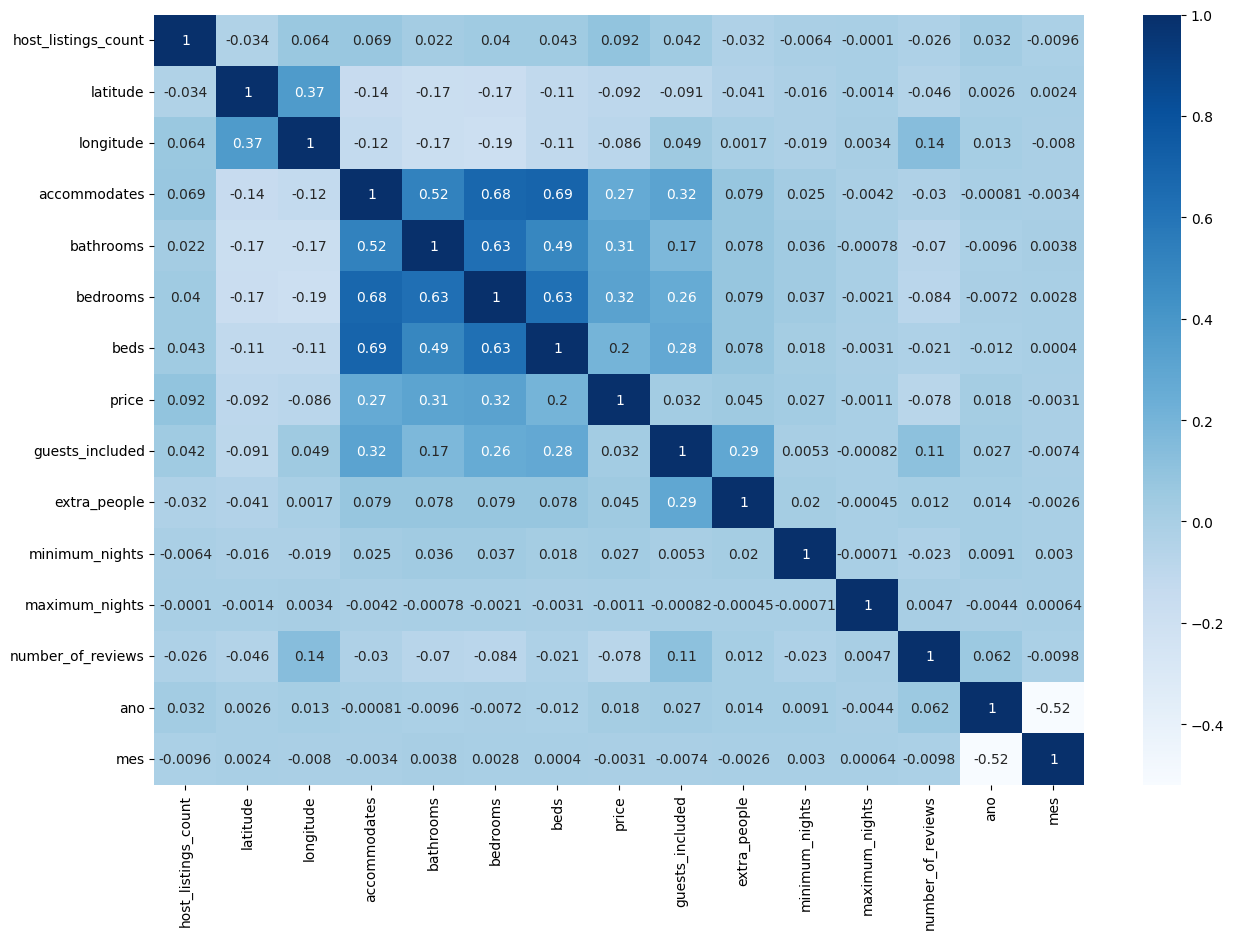

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(base_airbnb.corr(), annot=True, cmap='Blues')


#print(base_airbnb.corr())

#Definição de funções para análise de Outliers
- Vamos definir algumas funções para ajudar na análise de outliers das colunas.

In [ ]:
def limites(coluna):
  q1 = coluna.quantile(0.25)
  q3 = coluna.quantile(0.75)
  amplitude = q3 - q1
  return q1 - 1.5 * amplitude, q3 + 1.5 *amplitude

def excluir_outliers(df, nome_coluna):
  qtde_linhas = df.shape[0]
  lim_inf, lim_sup = limites(df[nome_coluna])
  df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
  linhas_removidas = qtde_linhas - - df.shape[0]
  return df, linhas_removidas

In [ ]:
print(limites(base_airbnb['price']))
base_airbnb['price'].describe()

(-524.0, 1276.0)


count    897709.000000
mean        647.922363
std        1705.998169
min           0.000000
25%         151.000000
50%         297.000000
75%         601.000000
max      138288.000000
Name: price, dtype: float64

In [ ]:
def diagrama_caixa(coluna):
  fig, (ax1, ax2)= plt.subplots(1, 2)
  fig.set_size_inches(15, 5)
  sns.boxplot(x=coluna, ax=ax1)
  ax2.set_xlim(limites(coluna))
  sns.boxplot(x=coluna, ax=ax2)

def histograma(coluna):
  plt.figure(figsize=(15, 5))
  sns.distplot(coluna, hist=True)

def grafico_barra(coluna):
  plt.figure(figsize=(15,5))
  ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
  ax.set_xlim(limites(coluna))


###price

<ipython-input-313-cd2269ef3726>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coluna, hist=True)


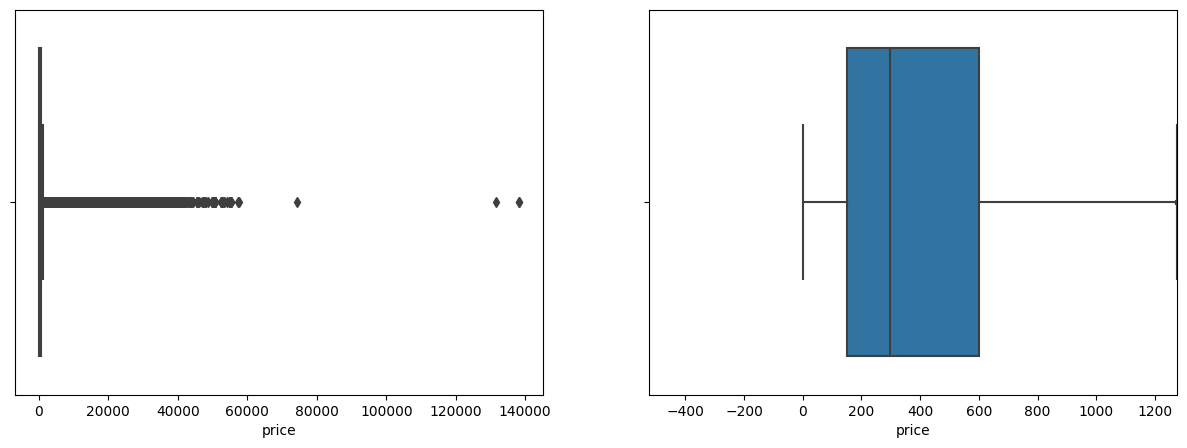

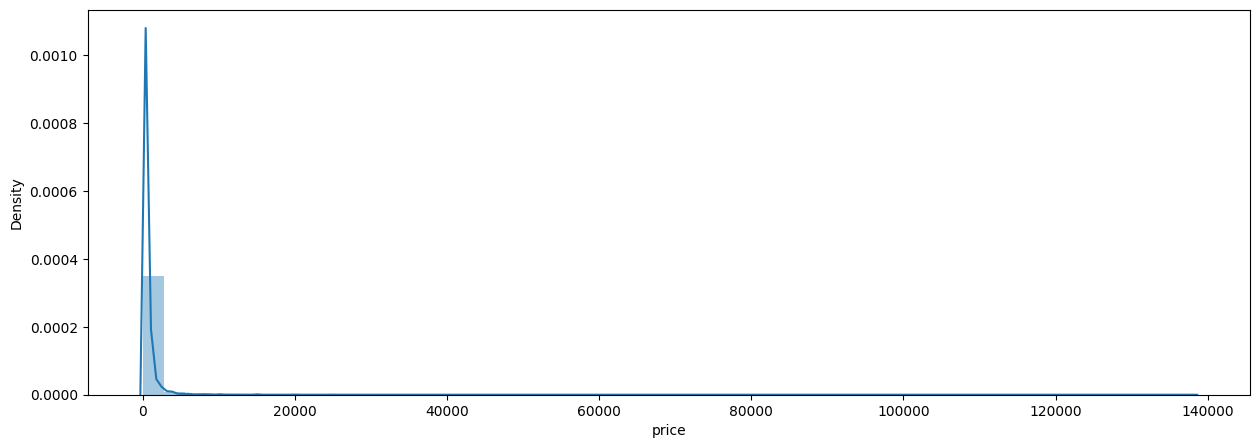

In [ ]:
diagrama_caixa(base_airbnb['price'])
histograma(base_airbnb['price'])

Como estamos contruindo um modelo para imóveis comuns, acredito que os valores acima do limite superior serão apenas de apartamentos de altíssimo luxo, que não é nosso objetivo. Por isso, vamos excluir esses outliers.

In [ ]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'price')
print(f'{linhas_removidas} linhas removidas')

1708136 linhas removidas


<ipython-input-313-cd2269ef3726>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coluna, hist=True)


(810427, 23)


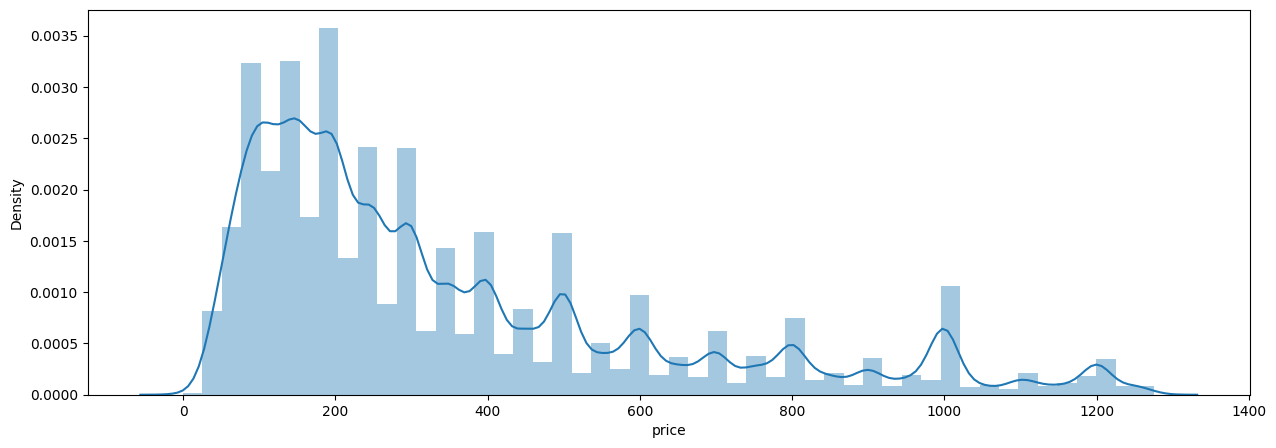

In [ ]:
histograma(base_airbnb['price'])
print(base_airbnb.shape)

###extra_people

<ipython-input-313-cd2269ef3726>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coluna, hist=True)


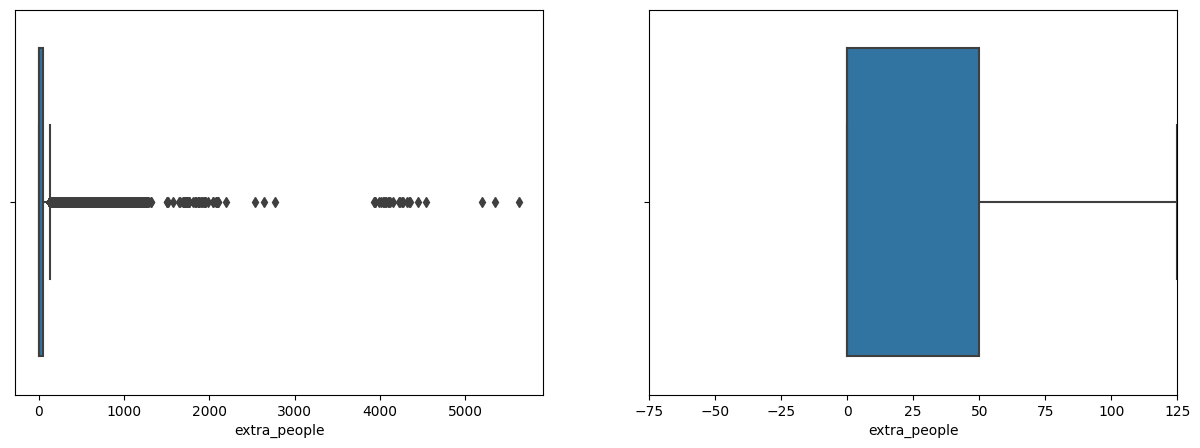

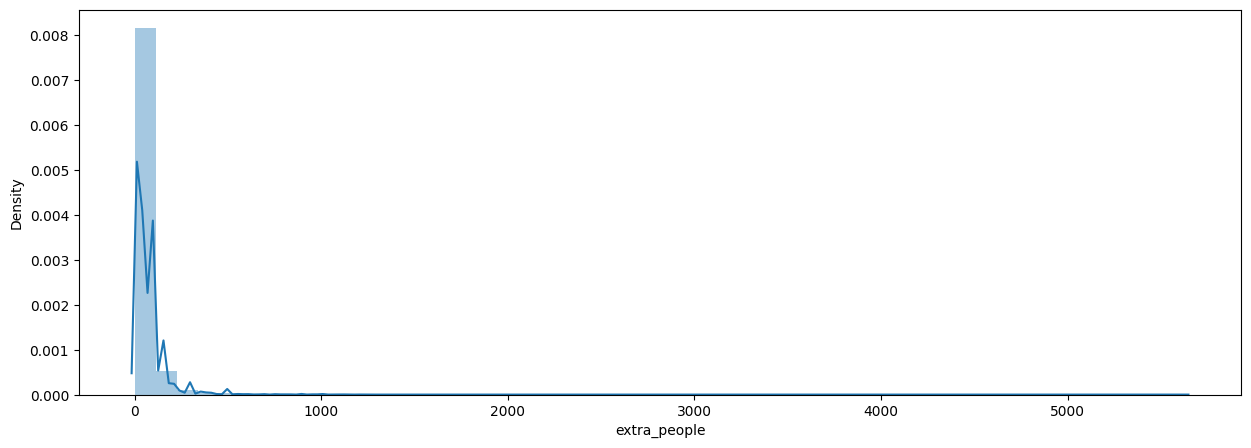

In [ ]:
diagrama_caixa(base_airbnb['extra_people'])
histograma(base_airbnb['extra_people'])

In [ ]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'extra_people')
print(f'{linhas_removidas} linhas removidas')

1561660 linhas removidas


###host_listings_count

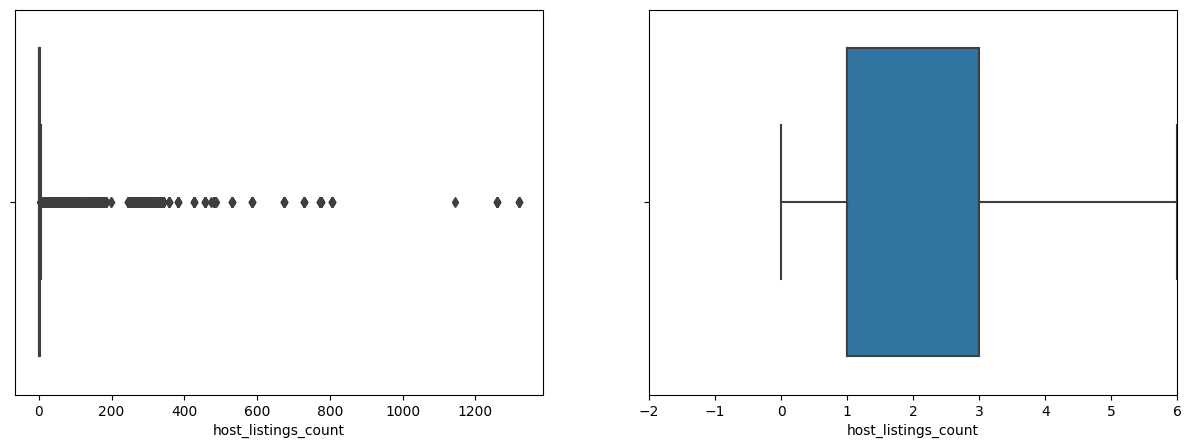

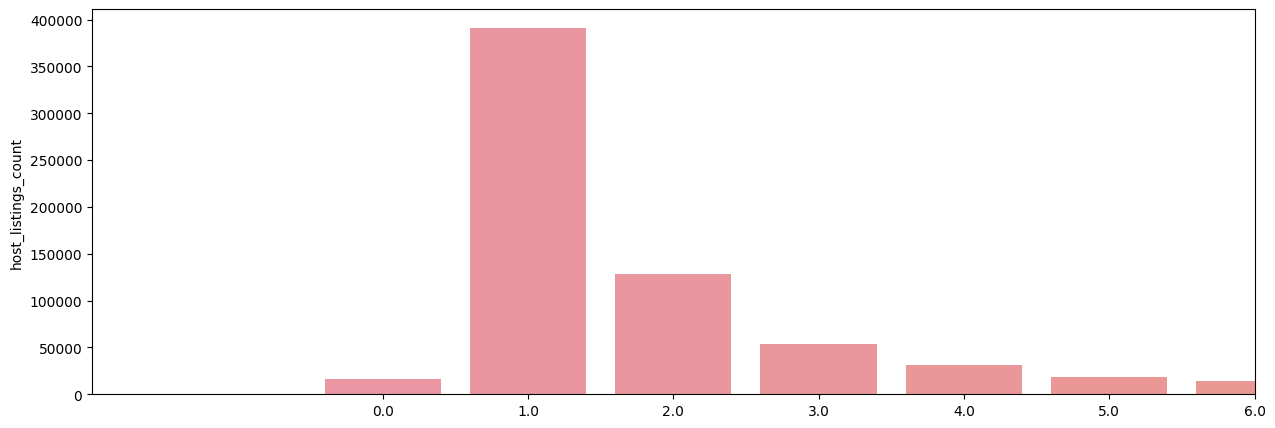

In [ ]:
diagrama_caixa(base_airbnb['host_listings_count'])
grafico_barra(base_airbnb['host_listings_count'])

Podemos excluir os outliers, porque para o objetivo do nosso projeto hosts com mais de 6 imóveis no airbnb não é o público alvo do objetivo do projeto (provavelmente são imobiliários ou profissionais que gerenciam imóveis no airbnb) 

In [ ]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'host_listings_count')
print(f'{linhas_removidas} linhas removidas')

1404743 linhas removidas


###accommodates

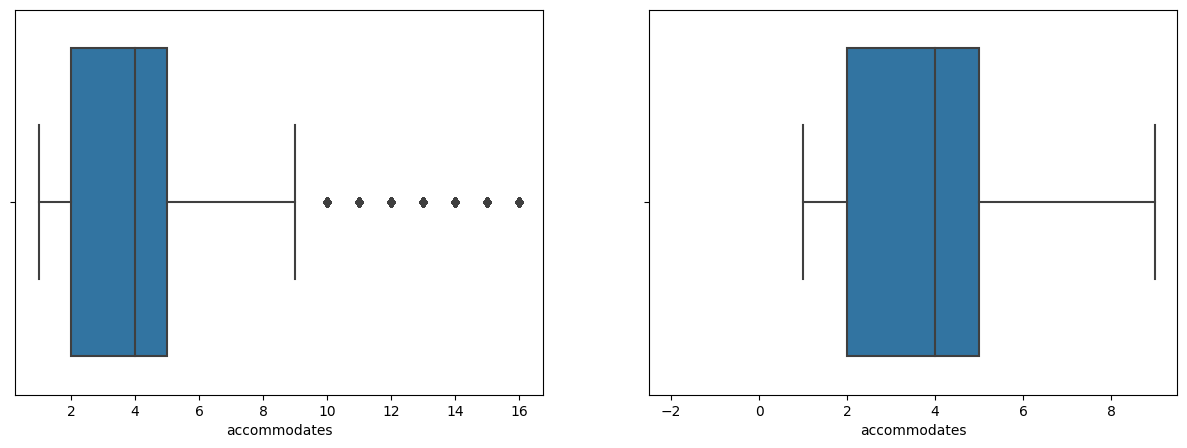

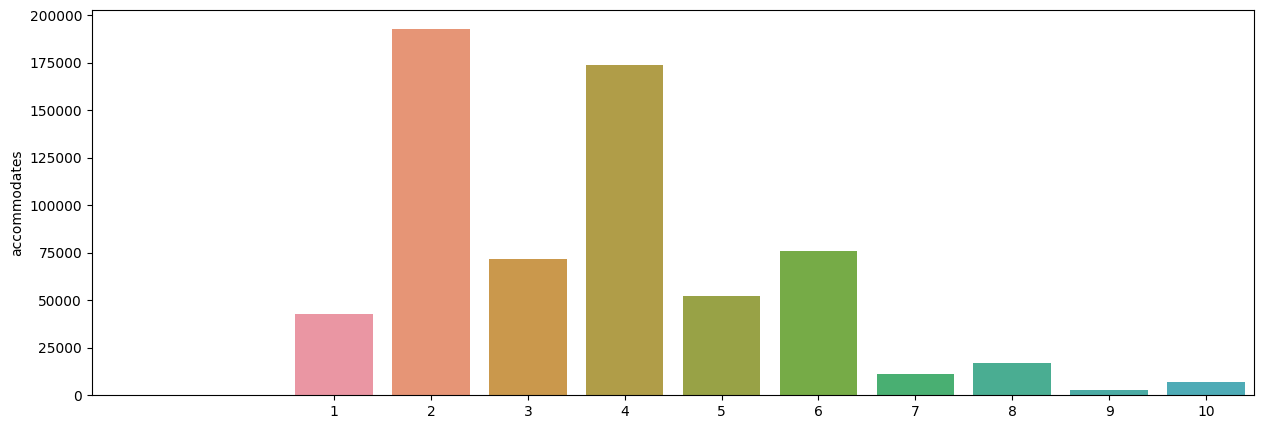

In [ ]:
diagrama_caixa(base_airbnb['accommodates'])
grafico_barra(base_airbnb['accommodates'])

- Pelo mesmo motivo do "host_listings_count" vamos excluir os outliers dessa coluna porque apartamentos que acomadam mais de 9 pessoas não são nosso foco, nosso objetivo é para immovéis comuns.
- Caso quisesse incluir apartamentos de alto padrão a gente poderia manter essa variável ou então construir um modelo só focado em imóveis com mais de 9 hóspedes.

In [ ]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'accommodates')
print(f'{linhas_removidas} linhas removidas')

1293874 linhas removidas


###bathrooms

<Axes: ylabel='bathrooms'>

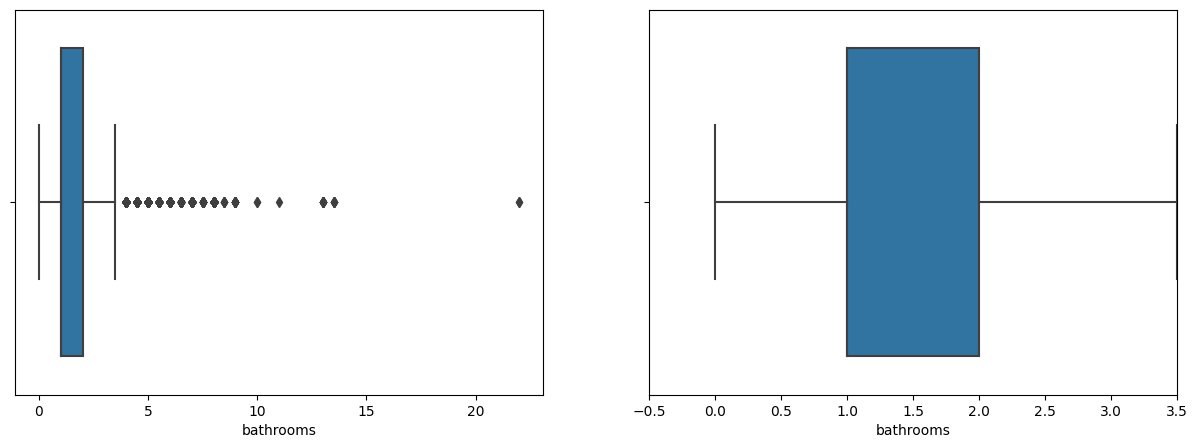

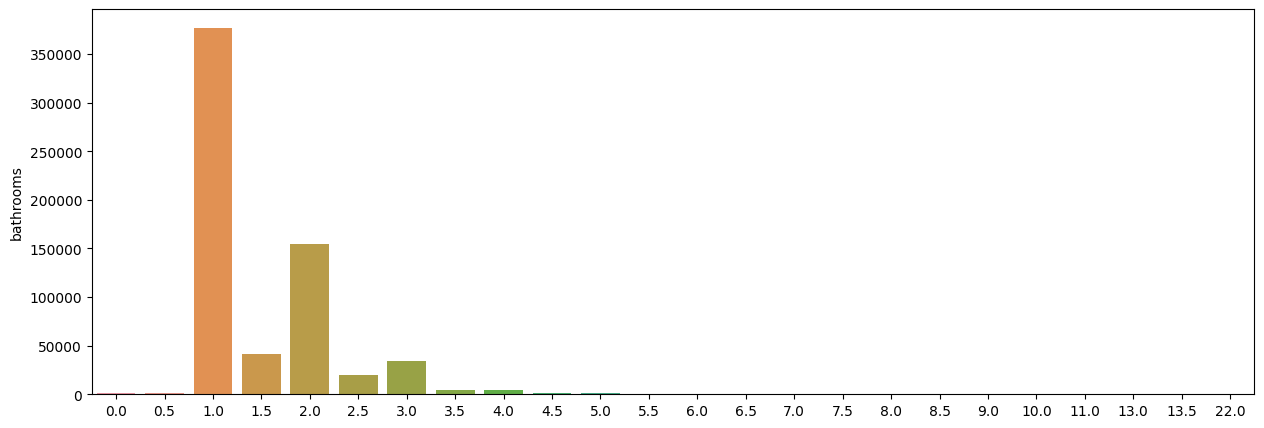

In [ ]:
diagrama_caixa(base_airbnb['bathrooms'])
plt.figure(figsize=(15, 5))
sns.barplot(x=base_airbnb['bathrooms'].value_counts().index, y=base_airbnb['bathrooms'].value_counts())

- Pelo mesmo motivo dos casos anteriores, vamos excluir os outliers nos banheiros

In [ ]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'bathrooms')
print(f'{linhas_removidas} linhas removidas')

1273834 linhas removidas


###bedrooms      

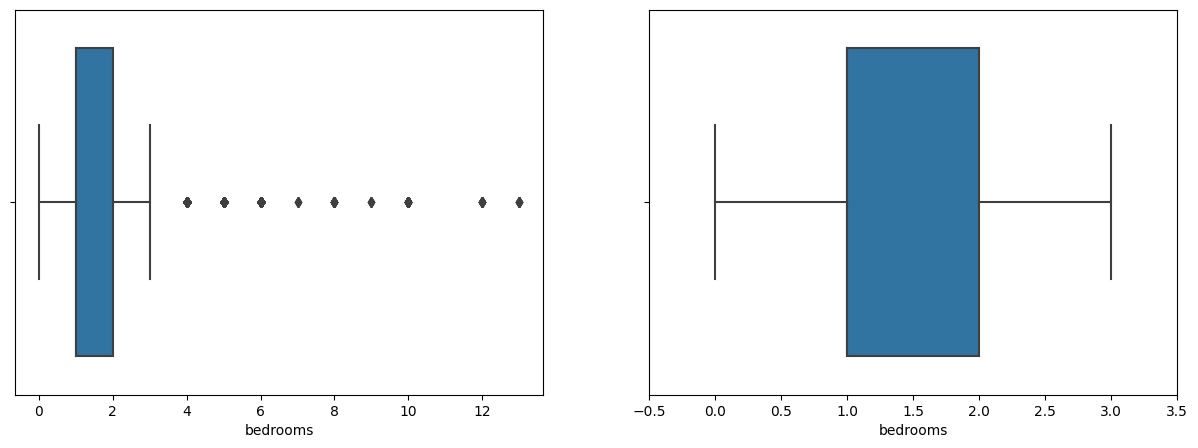

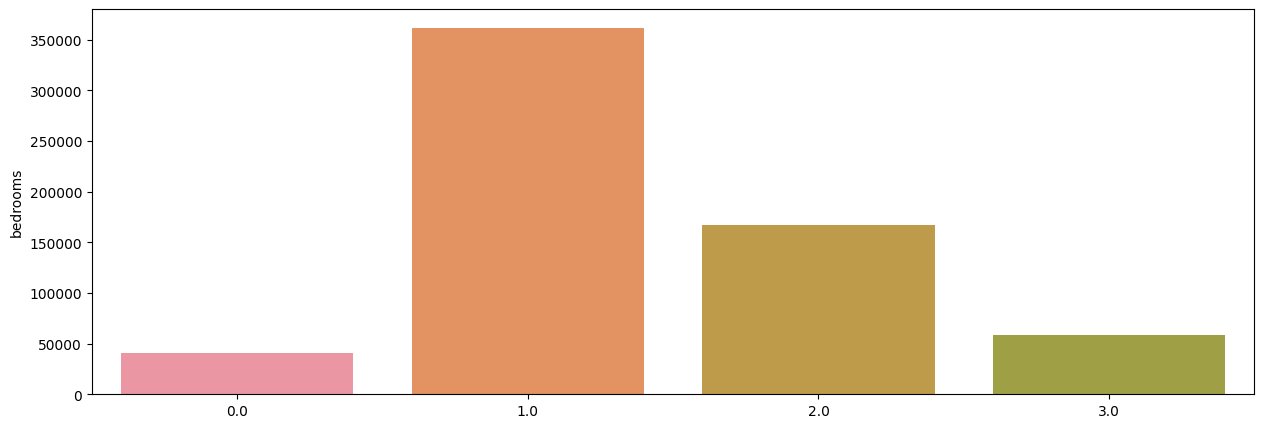

In [ ]:
diagrama_caixa(base_airbnb['bedrooms'])
grafico_barra(base_airbnb['bedrooms'])

- Pelo mesmo motivo dos anteriores, vamos excluir os outliers em quantidade de quartos

In [ ]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'bedrooms')
print(f'{linhas_removidas} linhas removidas')

1261458 linhas removidas


###beds

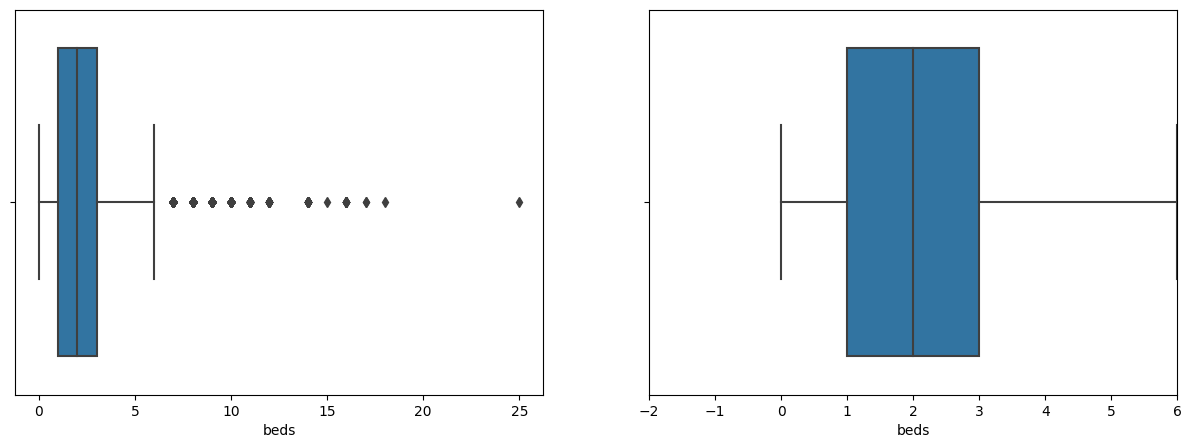

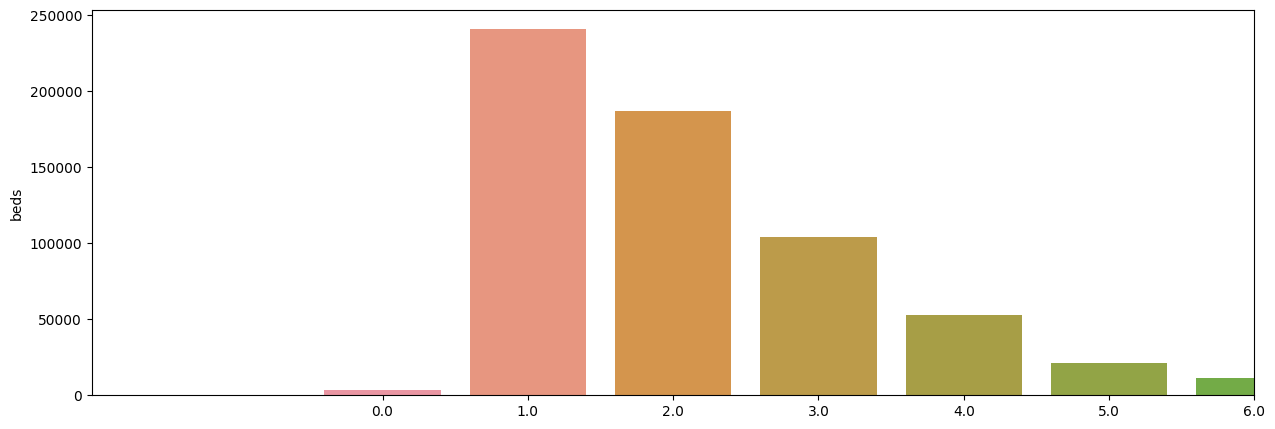

In [ ]:
diagrama_caixa(base_airbnb['beds'])
grafico_barra(base_airbnb['beds'])

- Pelo mesmo motivo dos anteriores, vamos excluir outliers em quantidade de camas

In [ ]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'beds')
print(f'{linhas_removidas} linhas removidas')

1250354 linhas removidas


###guests_included

(1.0, 1.0)


<Axes: ylabel='guests_included'>

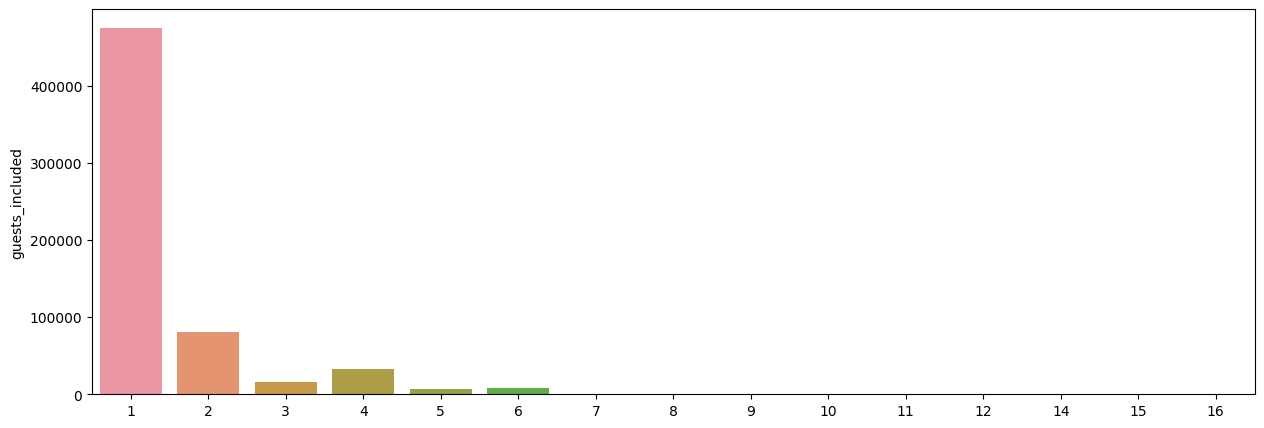

In [ ]:
#diagrama_caixa(base_airbnb['guests_included'])
#grafico_barra(base_airbnb['guests_included'])
print(limites(base_airbnb['guests_included']))
plt.figure(figsize=(15, 5))
sns.barplot(x=base_airbnb['guests_included'].value_counts().index, y=base_airbnb['guests_included'].value_counts())

Vamos remover esse feature da análise. Parece que os usuários do airbnb usam muito o valor padrão do airbnb como 1 guest inclued. Isso pode levar o nosso modelo a considerar uma feature que na verdade não é essencial para a definição do preço, por isso, vamos excluir a coluna da análise

In [ ]:
base_airbnb = base_airbnb.drop('guests_included', axis=1)
base_airbnb.shape

(622366, 22)

###minimum_nights

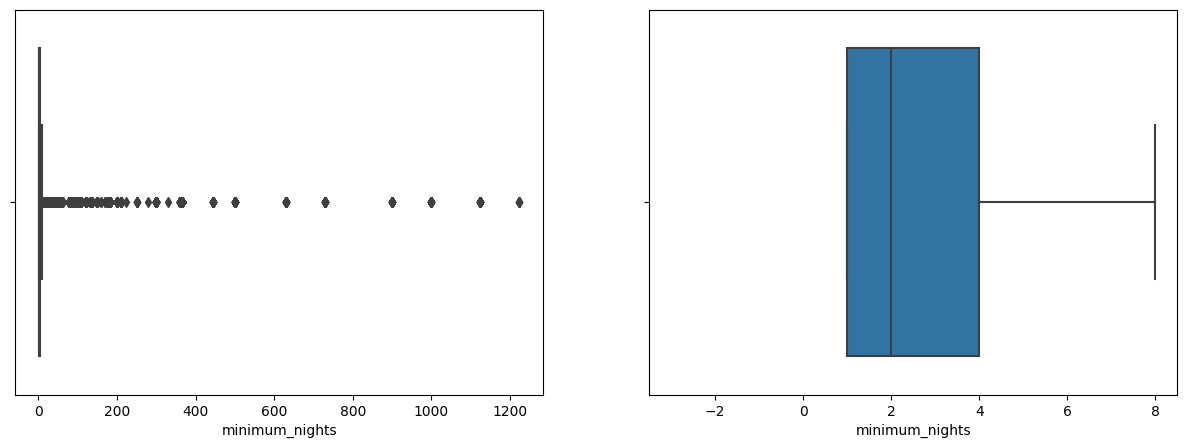

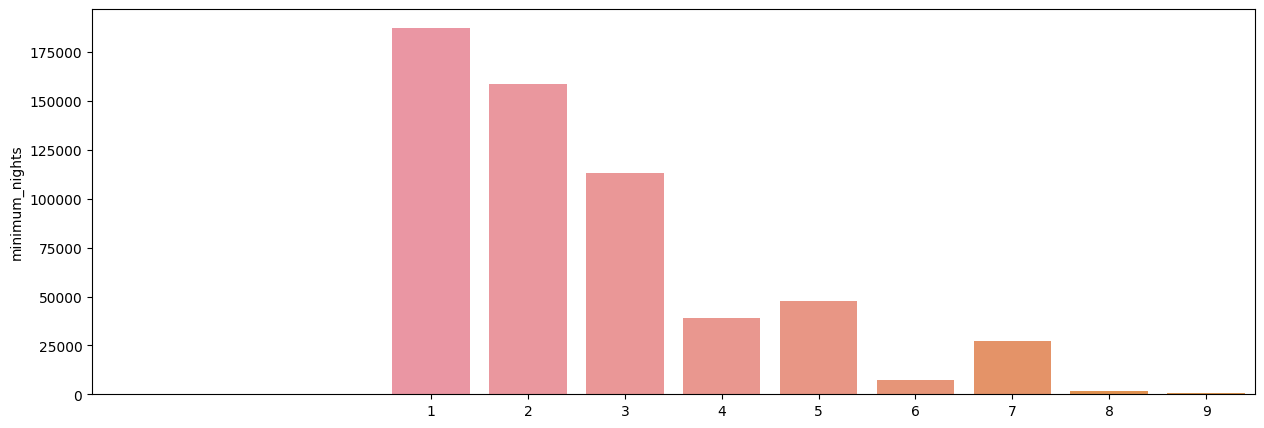

In [ ]:
diagrama_caixa(base_airbnb['minimum_nights'])
grafico_barra(base_airbnb['minimum_nights'])

- Aqui temos um motivo até mais forte para excluir esses apartamentos da análise

- Estamos querendo um modelo que ajude a precificar apartamentos comuns como uma pessoa comum gostaria de disponibilizar. No caso, apartamentos com mais de 8 noites como "mínimo de noites" podem ser apartamentos de temporada ou ainda apartamentos para morar, em que o host exige pelo menos 1 mês no apartamento.

- Por isso, vamos excluir os outliers dessa coluna

In [ ]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'minimum_nights')
print(f'{linhas_removidas} linhas removidas')

1204349 linhas removidas


###maximum_nights

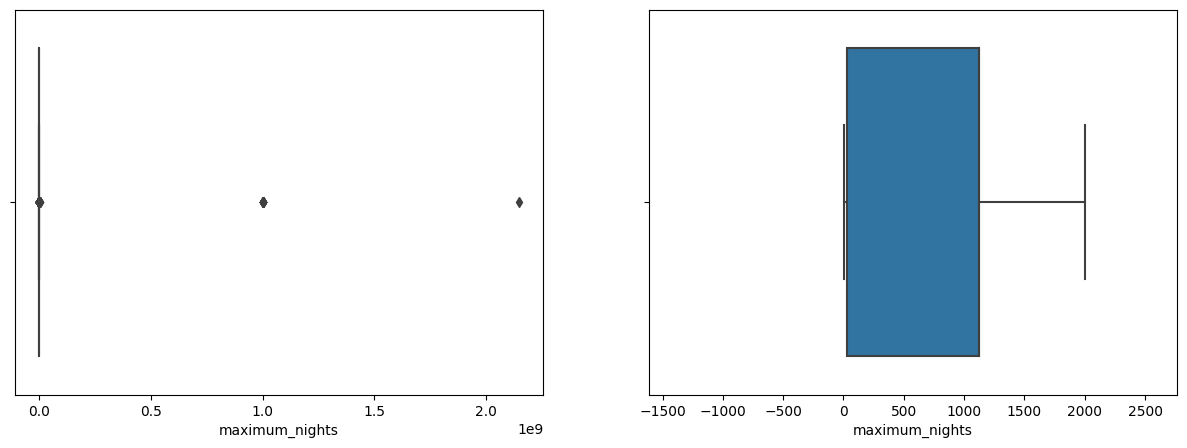

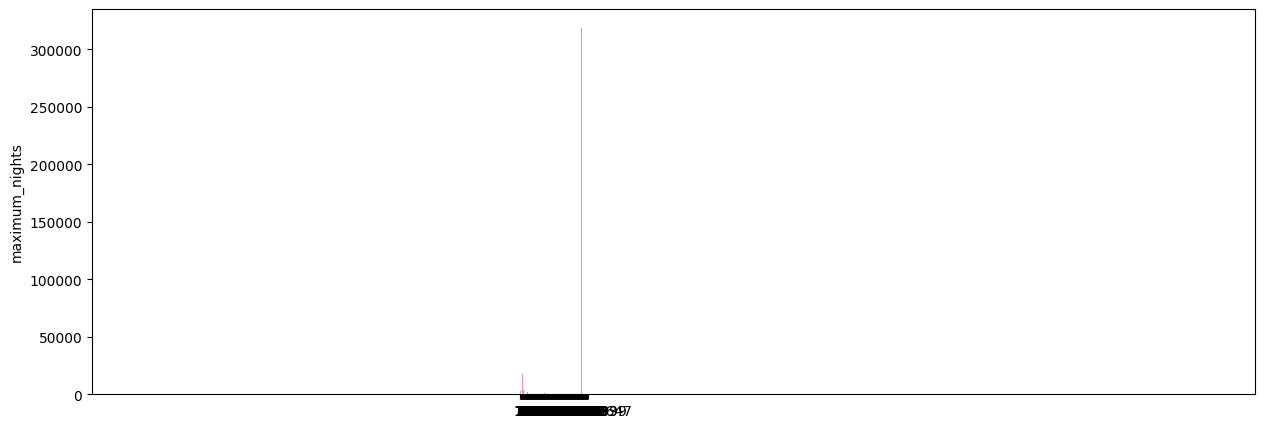

In [ ]:
diagrama_caixa(base_airbnb['maximum_nights'])
grafico_barra(base_airbnb['maximum_nights'])

- Parece que quase todos os hosts não preenchem esse campo de maximum nights, então ele não parece que vai ser um fator relevante.

- É melhor excluirmos essa coluna da análise

In [ ]:
base_airbnb = base_airbnb.drop('maximum_nights', axis=1)
base_airbnb.shape

(581983, 21)

###number_of_reviews

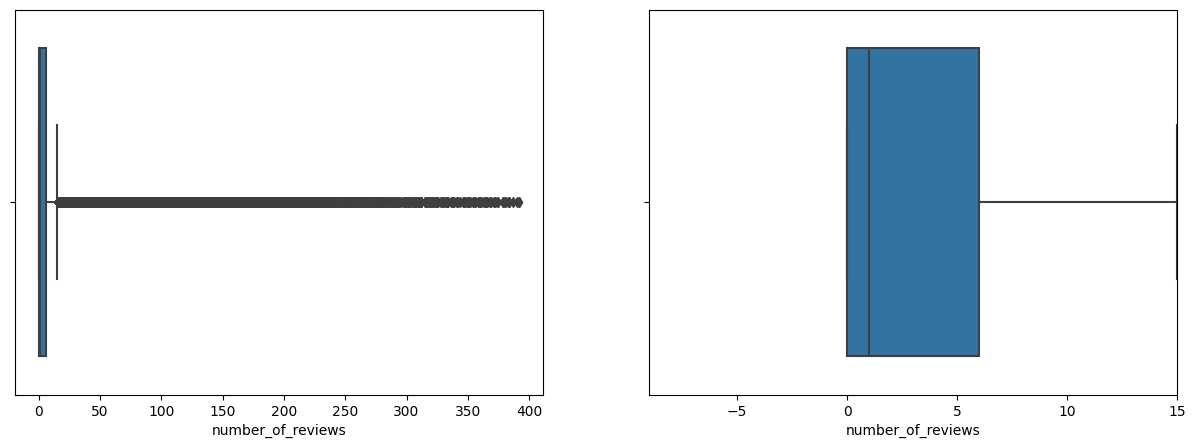

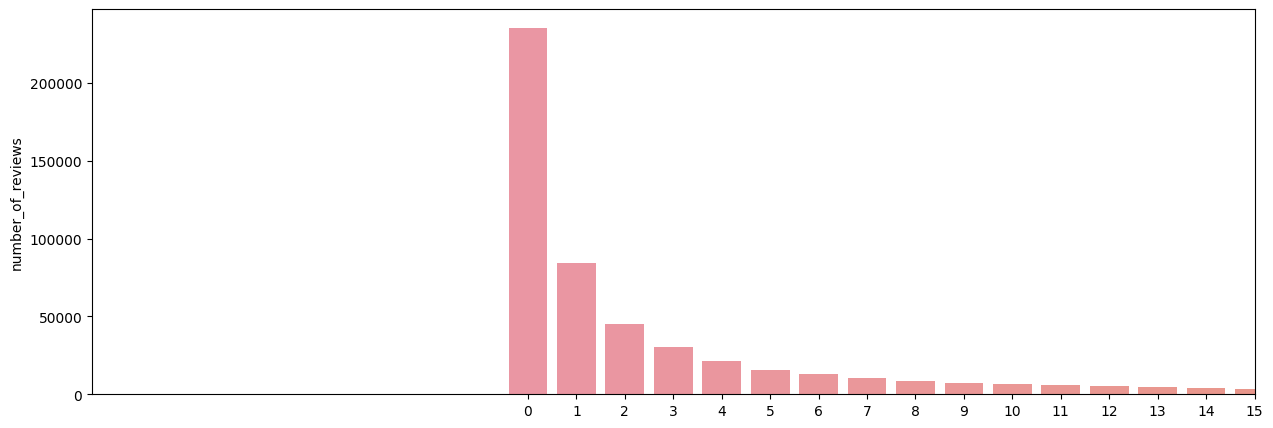

In [ ]:
diagrama_caixa(base_airbnb['number_of_reviews'])
grafico_barra(base_airbnb['number_of_reviews'])

###Aqui poderíamos tomar algumas decisões diferentes. No caso, vamos tomar a decisão baseado na minha análise pessoal de tirar essa características

- Se excluirmos os outliers, vamos excluir as pessoas que que tem a maior quantidade de reviews (o que normalmente são os hosts que têm mais aluguel). Isso pode impactar negativamente nosso modelo

- Pensando em nosso objetivo, se eu tenho um imóvel parado e quero colocá-lo lá, é claro que eu não tenho review nenhuma. Então talvez tirar essa caracterìstica da análise pode nos ajudar.

In [ ]:
base_airbnb = base_airbnb.drop('number_of_reviews', axis=1)
base_airbnb.shape

(581983, 20)

###property_type

Apartment                 458354
House                      51387
Condominium                26456
Serviced apartment         12671
Loft                       12352
Guest suite                 3621
Bed and breakfast           3472
Hostel                      2665
Guesthouse                  2155
Other                       1957
Villa                       1294
Townhouse                    969
Aparthotel                   693
Chalet                       481
Earth house                  468
Tiny house                   457
Boutique hotel               447
Hotel                        376
Casa particular (Cuba)       298
Cottage                      230
Bungalow                     207
Dorm                         185
Cabin                        141
Nature lodge                 124
Castle                        80
Treehouse                     76
Island                        54
Boat                          53
Hut                           40
Campsite                      34
Resort    

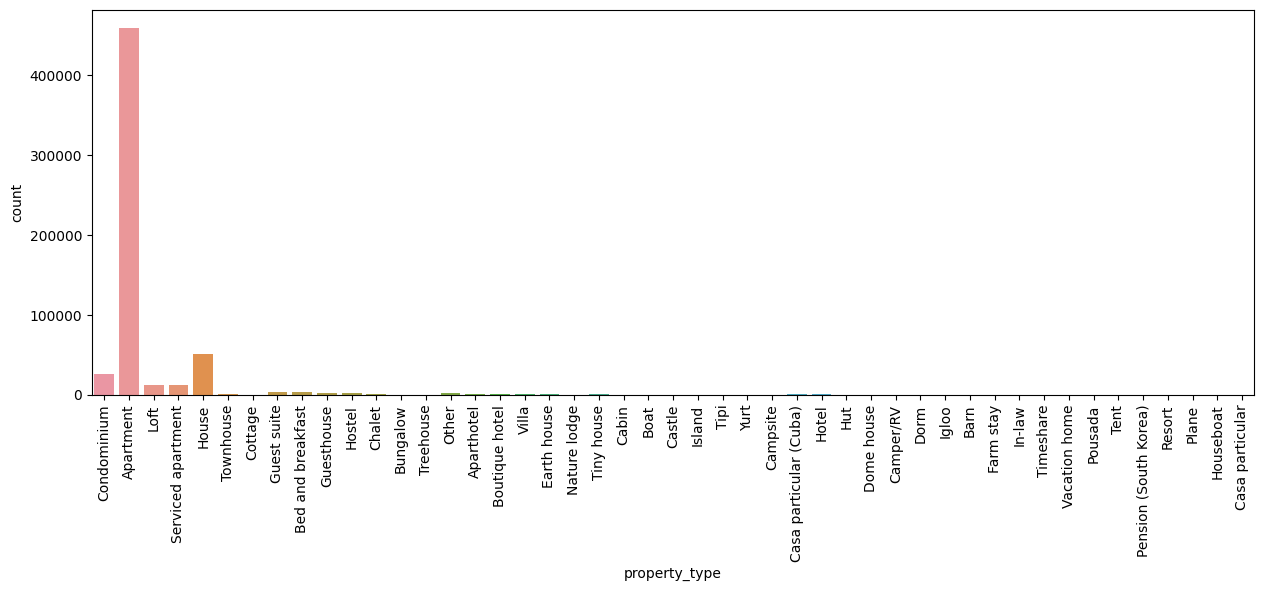

In [ ]:
print(base_airbnb['property_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='property_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

['Other', 'Villa', 'Townhouse', 'Aparthotel', 'Chalet', 'Earth house', 'Tiny house', 'Boutique hotel', 'Hotel', 'Casa particular (Cuba)', 'Cottage', 'Bungalow', 'Dorm', 'Cabin', 'Nature lodge', 'Castle', 'Treehouse', 'Island', 'Boat', 'Hut', 'Campsite', 'Resort', 'Camper/RV', 'Yurt', 'Tent', 'Tipi', 'Barn', 'Farm stay', 'Pension (South Korea)', 'Dome house', 'In-law', 'Igloo', 'Vacation home', 'Timeshare', 'Pousada', 'Houseboat', 'Casa particular', 'Plane']
Apartment             458354
House                  51387
Condominium            26456
Serviced apartment     12671
Loft                   12352
Outros                  8850
Guest suite             3621
Bed and breakfast       3472
Hostel                  2665
Guesthouse              2155
Name: property_type, dtype: int64


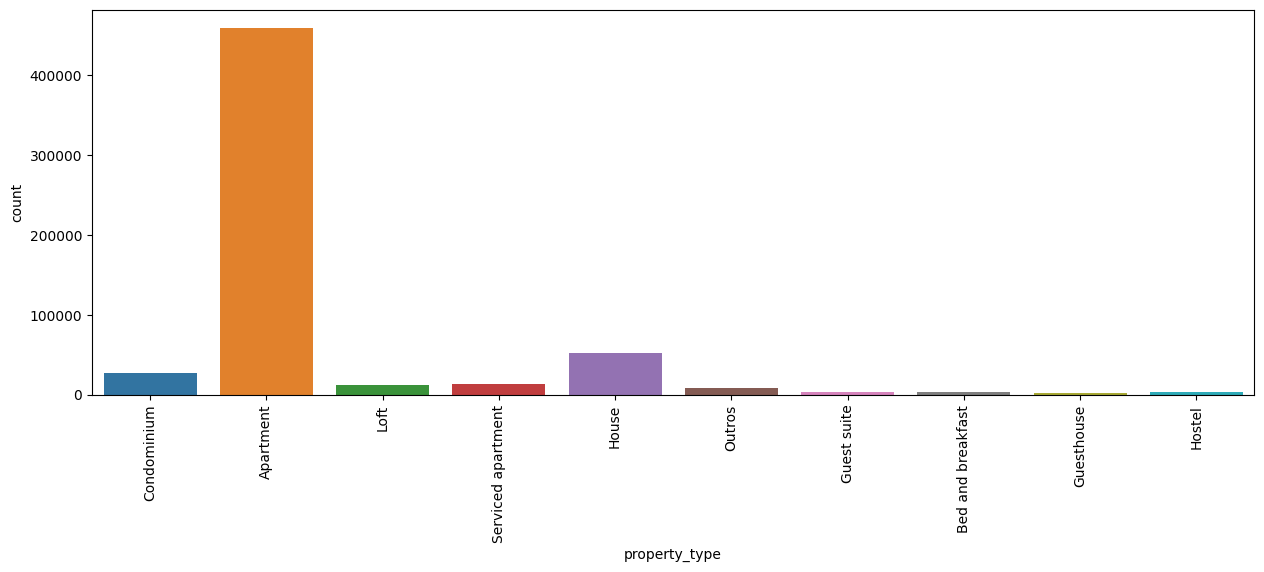

In [ ]:
tabela_tipos_casa = base_airbnb['property_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_tipos_casa.index:
  if tabela_tipos_casa[tipo] < 2000:
    colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
  base_airbnb.loc[base_airbnb['property_type']==tipo, 'property_type'] = 'Outros'
print(base_airbnb['property_type'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='property_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

###room_type

Entire home/apt    372443
Private room       196859
Shared room         11714
Hotel room            967
Name: room_type, dtype: int64


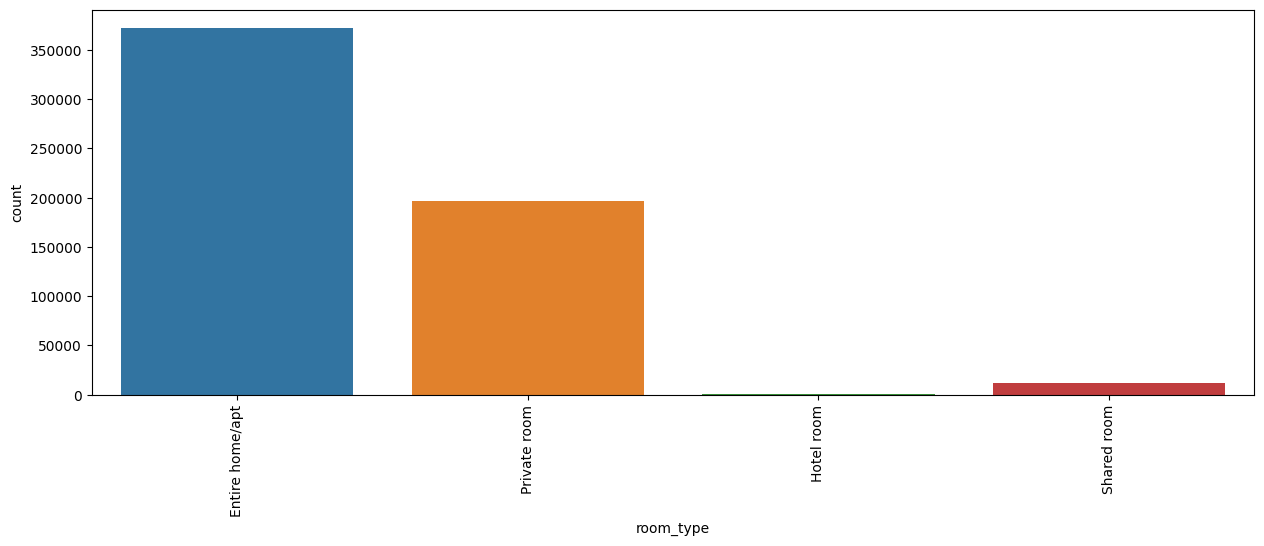

In [ ]:
print(base_airbnb['room_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='room_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

###bed_type

Real Bed         570643
Pull-out Sofa      8055
Futon              1634
Airbed             1155
Couch               496
Name: bed_type, dtype: int64
['Pull-out Sofa', 'Futon', 'Airbed', 'Couch']
Real Bed    570643
Outros       11340
Name: bed_type, dtype: int64


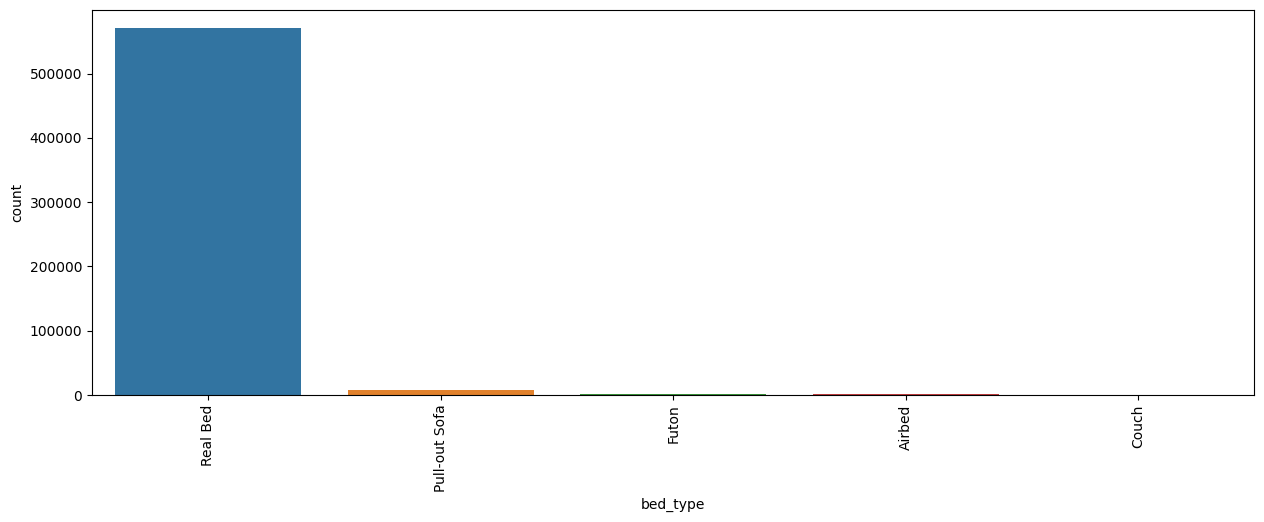

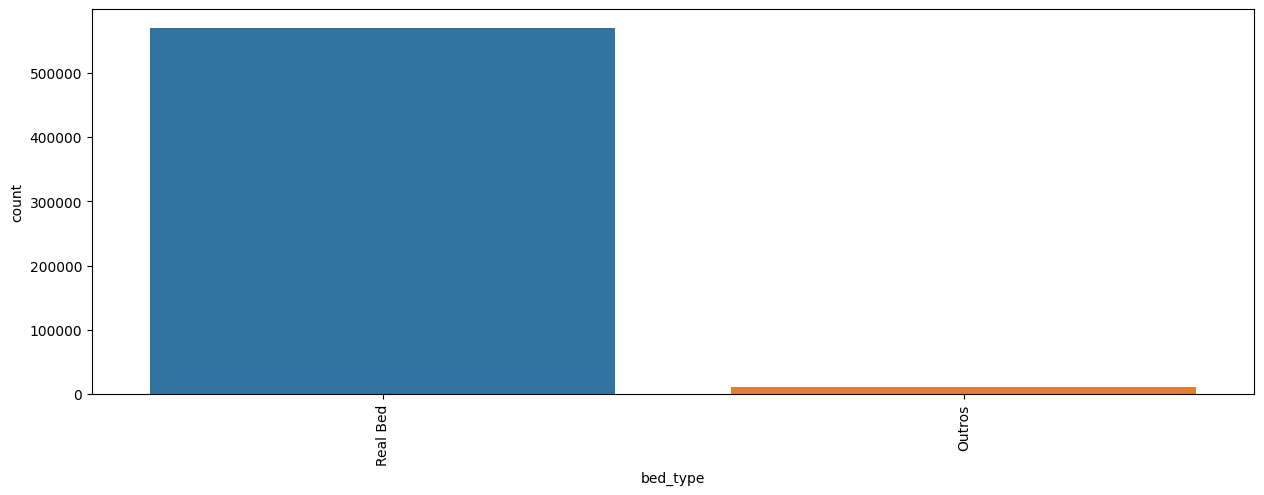

In [ ]:
print(base_airbnb['bed_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='bed_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

#Agrupando categorias de cancellation_policy
tabela_bed = base_airbnb['bed_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_bed.index:
  if tabela_bed[tipo] < 10000:
    colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
  base_airbnb.loc[base_airbnb['bed_type']==tipo, 'bed_type'] = 'Outros'

print(base_airbnb['bed_type'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='bed_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

###cancellation_policy

flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9696
super_strict_60                   135
super_strict_30                    32
Name: cancellation_policy, dtype: int64
['strict', 'super_strict_60', 'super_strict_30']
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9863
Name: cancellation_policy, dtype: int64


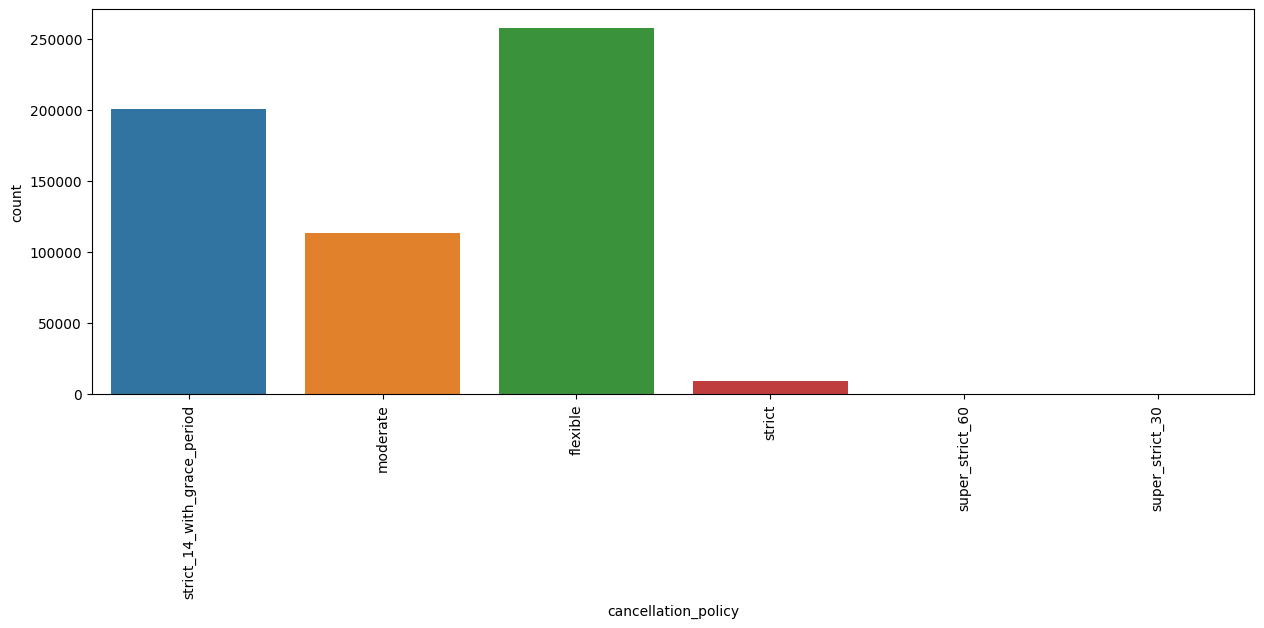

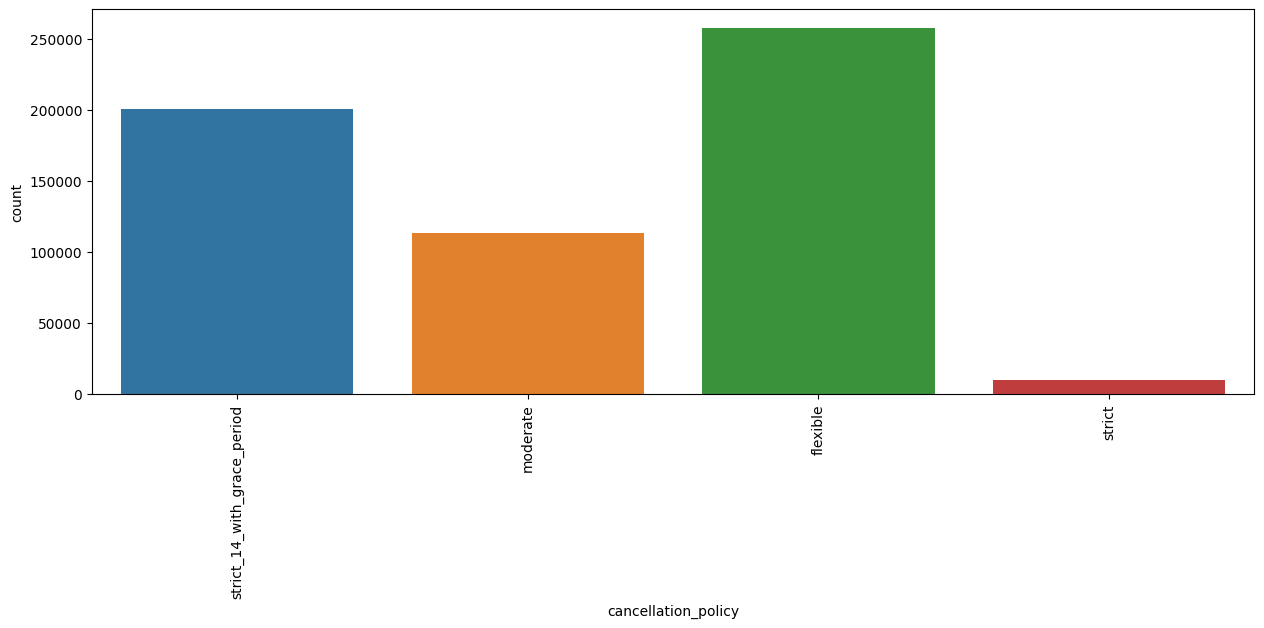

In [ ]:
print(base_airbnb['cancellation_policy'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='cancellation_policy', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

#Agrupando categorias de cancellation_policy
tabela_cancel = base_airbnb['cancellation_policy'].value_counts()
colunas_agrupar = []

for tipo in tabela_cancel.index:
  if tabela_cancel[tipo] < 10000:
    colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
  base_airbnb.loc[base_airbnb['cancellation_policy']==tipo, 'cancellation_policy'] = 'strict'
print(base_airbnb['cancellation_policy'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='cancellation_policy', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

###amenities

- Como t emos uma diversidade muito grande de amenities e, às vezes, as mesmas amenities podem ser escritas de formas diferentes

- Vamos avaliar a quantidade de amenities como o parâmetro para o nosso modelo.

In [ ]:
print(base_airbnb['amenities'].iloc[1].split(','))
print(len(base_airbnb['amenities'].iloc[1].split(',')))

base_airbnb['n_amenities'] = base_airbnb['amenities'].str.split(',').apply(len)

['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', 'Doorman', 'Elevator', '"Buzzer/wireless intercom"', '"Family/kid friendly"', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"}']
14


- Removendo a coluna amenities

In [ ]:
base_airbnb = base_airbnb.drop('amenities', axis=1)
base_airbnb.shape

(581983, 20)

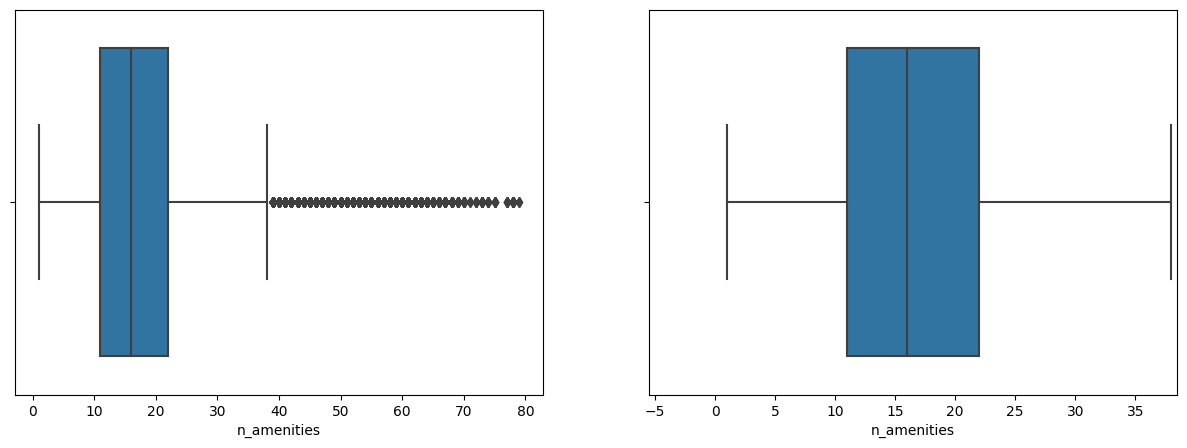

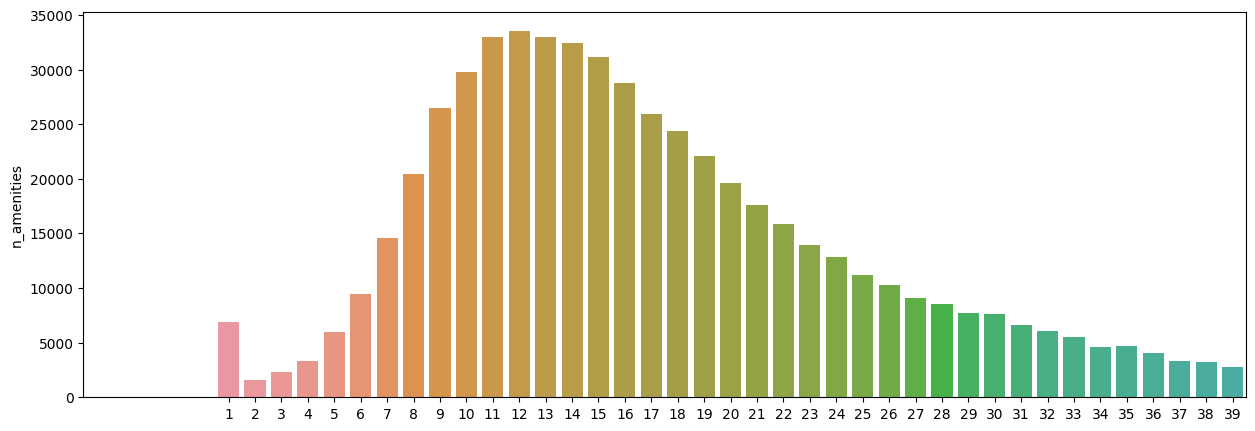

In [ ]:
diagrama_caixa(base_airbnb['n_amenities'])
grafico_barra(base_airbnb['n_amenities'])

In [ ]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'n_amenities')
print(f'{linhas_removidas} linhas removidas')

1139623 linhas removidas


#Visualização de Mapa das Propriedades

In [ ]:
amostra = base_airbnb.sample(n=50000)
centro_mapa = {'lat':amostra.latitude.mean(), 'lon':amostra.longitude.mean()}
mapa = px.density_mapbox(amostra, lat='latitude', lon='longitude', z='price', radius=2.5, center=centro_mapa, zoom=10, mapbox_style='stamen-terrain')

mapa.show()

#Encoding

Precisamos ajustar as features para facilitar o trabalho do modelo futuro (features de categoria, true e false, etc.)

- Features de Valores true ou false, vamos substituir True por 1 e False por 0.

- Features de Categoria (features em que os valores de coluna são textos) vamos utilizar o método de encoding de variáveis dummies.

In [ ]:
print(base_airbnb.columns)

Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'extra_people', 'minimum_nights',
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'ano', 'mes', 'n_amenities'],
      dtype='object')


In [ ]:
colunas_tf = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']
base_airbnb_cod = base_airbnb.copy()

for coluna in colunas_tf:
  base_airbnb_cod.loc[base_airbnb_cod[coluna]=='t', coluna] = 1
  base_airbnb_cod.loc[base_airbnb_cod[coluna]=='f', coluna] = 0
#print(base_airbnb_cod.iloc[0])

In [ ]:
colunas_categorias = ['property_type', 'room_type', 'bed_type', 'cancellation_policy']
base_airbnb_cod = pd.get_dummies(data=base_airbnb_cod, columns=colunas_categorias)
display(base_airbnb_cod.head())

,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,extra_people,...,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Outros,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period
0,1,2.0,-22.96592,-43.17896,5,1.0,2.0,2.0,329.0,62.0,...,1,0,0,0,0,1,0,0,0,1
1,0,3.0,-22.97712,-43.19045,3,1.0,1.0,2.0,158.0,45.0,...,1,0,0,0,0,1,0,0,0,1
2,1,1.0,-22.98302,-43.21427,3,1.0,1.0,2.0,270.0,42.0,...,1,0,0,0,0,1,0,0,0,1
3,1,1.0,-22.98816,-43.19359,3,1.5,1.0,2.0,374.0,62.0,...,1,0,0,0,0,1,0,0,0,1
16,0,2.0,-22.92873,-43.17473,4,2.0,3.0,4.0,258.0,0.0,...,1,0,0,0,0,1,0,0,0,1


#Modelo de Previsão

- Métricas de Avaliação

In [ ]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
  r2 = r2_score(y_teste, previsao)
  RSME = np.sqrt(mean_squared_error(y_teste, previsao))
  return f'Modelo {nome_modelo}:\nR²:{r2:.2%}\nRSME:{RSME:.2f}'

- Escolha dos Modelos a serem testados

  1-RandomForest

  2-LinearRegression

  3-Extra Tree

In [ ]:
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()

modelos = {'RandomForest': modelo_rf,
          'LinearRegression': modelo_lr,
          'ExtraTrees': modelo_et, 
          }

y = base_airbnb_cod['price']
x = base_airbnb_cod.drop('price', axis=1)

- Separa os dados em treino e teste + Treino do Modelo

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

for nome_modelo, modelo in modelos.items():
  #treinar
  modelo.fit(x_train, y_train)
  #testar
  previsao = modelo.predict(x_test)
  print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo RandomForest:
R²:97.21%
RSME:44.04
Modelo LinearRegression:
R²:32.69%
RSME:216.30
Modelo ExtraTrees:
R²:97.50%
RSME:41.70


#Análise do Melhor Modelo

In [ ]:
for nome_modelo, modelo in modelos.items():
  #testar
  previsao = modelo.predict(x_test)
  print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo RandomForest:
R²:97.21%
RSME:44.04
Modelo LinearRegression:
R²:32.69%
RSME:216.30
Modelo ExtraTrees:
R²:97.50%
RSME:41.70


- Modelo Escolhido: ExtraTressRegressor

  Esse foi o modelo com o maior valor de R² e ao mesmo tempo o menor valor de RSME.

  Como não tivemos uma grande diferença de velocidade e de previsão desse modelo com o modelo de RandomForest (que teve resultados próximos de R² e RSME), vamos escolher o modelo ExtraTrees.

  O modelo de regressão linear não obteve um resultado satisfatório, com valores de R² e RSME muito piores do que os outros 2 modelos.

- Resultados das Métricas de avaliação no Modelo Vencedor:

  Modelo ExtraTrees:<br>
  R²:97.50%<br>
  RSME:41.69

#Ajustes e Melhorias no Melhor Modelo

[0.01359135 0.0396814  0.10414637 0.10143212 0.07212666 0.06725492
 0.11296948 0.0528216  0.08681008 0.06533769 0.02175216 0.
 0.01123263 0.00465596 0.08899018 0.01281739 0.00136765 0.00517595
 0.00066023 0.00096685 0.00064977 0.00709468 0.00214753 0.00224881
 0.00228066 0.07037561 0.00025868 0.0041653  0.001811   0.00264388
 0.0027196  0.01944264 0.01235981 0.00082611 0.00718522]
Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'extra_people',
       'minimum_nights', 'instant_bookable', 'is_business_travel_ready', 'ano',
       'mes', 'n_amenities', 'property_type_Apartment',
       'property_type_Bed and breakfast', 'property_type_Condominium',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Outros', 'property_type_Serviced apartment',
       'room_type_Entire home/apt', 'room_type_Hotel r

,0
bedrooms,0.112969
latitude,0.104146
longitude,0.101432
n_amenities,0.088990
extra_people,0.086810
accommodates,0.072127
room_type_Entire home/apt,0.070376
bathrooms,0.067255
minimum_nights,0.065338
beds,0.052822


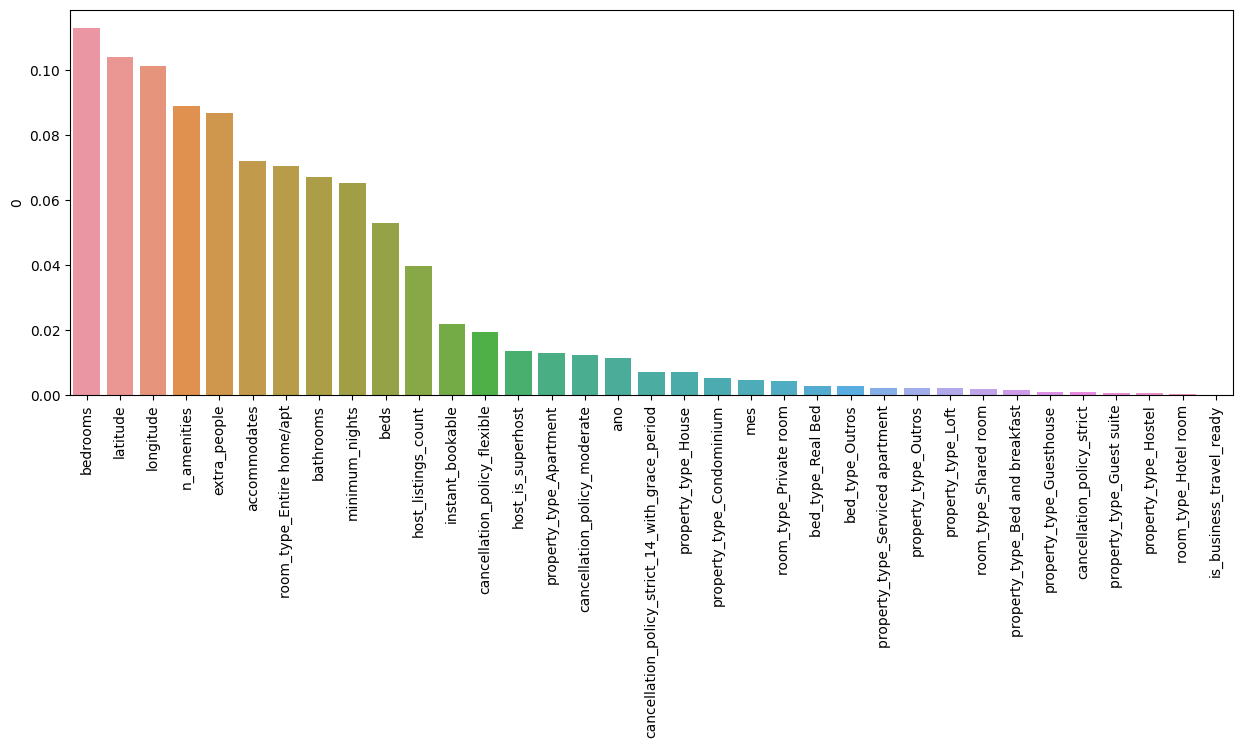

In [ ]:
print(modelo_et.feature_importances_)
print(x_train.columns)

importancia_features = pd.DataFrame(modelo_et.feature_importances_, x_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)

display(importancia_features)

plt.figure(figsize=(15, 5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)

#Ajustes Finais no Modelo

  - is_business_travel ready não parece ter muito impacto em nosso modelo. Por isso, para chegar em um modelo mais simples, vamos excluir essa feature e testar o modelo sem ela.

In [ ]:
base_airbnb_cod = base_airbnb_cod.drop('is_business_travel_ready', axis=1)

y = base_airbnb_cod['price']
x = base_airbnb_cod.drop('price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

modelo_et.fit(x_train, y_train)
#testar
previsao = modelo_et.predict(x_test)
print(avaliar_modelo('ExtraTrees', y_test, previsao))

Modelo ExtraTrees:
R²:97.49%
RSME:41.77


In [ ]:
base_teste = base_airbnb_cod.copy()
for coluna in base_teste:
  if 'bed_type' in coluna:
    base_teste = base_teste.drop(coluna, axis=1)
print(base_teste.columns)

y = base_teste['price']
x = base_teste.drop('price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

modelo_et.fit(x_train, y_train)
#testar
previsao = modelo_et.predict(x_test)
print(avaliar_modelo('ExtraTrees', y_test, previsao))

Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'extra_people', 'minimum_nights', 'instant_bookable', 'ano', 'mes',
       'n_amenities', 'property_type_Apartment',
       'property_type_Bed and breakfast', 'property_type_Condominium',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Outros', 'property_type_Serviced apartment',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period'],
      dtype='object')
Modelo ExtraTrees:
R²:97.49%
RSME:41.76


In [ ]:
print(previsao)

[125.2  279.77 144.47 ... 298.87 151.65 156.97]


#Deploy do Projeto

In [ ]:
x['price'] = y
x.to_csv('dados.csv')

In [ ]:
import joblib
joblib.dump(modelo_et, 'modelo.joblib', compress = 3)

['modelo.joblib']